# Assignment 1: Data Description & Exploratory Data Analysis

### Group 35: Prasojo, Naufal (14303440)

### Section 0: TA feedback

#### **Grade: 28.7/30**

- Writing: Please always use full sentences.
- Pre-selection of variables: How about room_shared and room_private? 
- Scientific Question 2.3: The word "influence" can be misleading. Association vs causation. We usually can't use observational data to make causal inference.
- Scientific Question: It seems that you are interested in both prediction and inference, but since some methods differ depending on the aim, I would suggest choosing one to be the primary focus of your project.
- Visualization: If multiple plots are shown, they should be combined into a single one.
- Visualization: Some of the plots are very creative!
- Visualization: Interpretation: "capacity also raises prices": Association vs causation. We usually can't use observational data to make causal statements.


This is <mark>revisions to assignment 1</mark> in a markdown cell. \
These are <span style="opacity:0.5">original assigment 1</span> or deleted words in a markdown cell.


### Section 1: Data Description

**1.1 Data Summary**
- **Dataset Name:** Airbnb Prices in European Cities
- **Source:** Kaggle dataset by The Devastator (2021). Available at
https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities
- **License:** CC BY-NC 4.0 (Attribution-NonCommercial).
- **Data Collection:** Listings were web-scraped from Airbnb for 10 European cities (Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, London, Paris, Rome, Vienna), but for this assignment we only use Athens data.
     - Each city has two files (weekday and weekend) capturing snapshot prices for 2-night stays for two guests.
     - Approx. 2627~2653 observations (rows) and 19 variables (columns).



**Variable Description**

| Variable Name                        | Type                | Description                                                         |
| :----------------------------------- | :------------------ | :------------------------------------------------------------------ |
| `realSum`                            | Numeric             | Total price (in euros) for the stay.                                |
| `room_type`                          | Categorical         | Type of accommodation (Entire home/apt, Private room, Shared room). |
| `room_shared`                        | Boolean             | 'True' if room is shared; 'False' otherwise.                        |
| `room_private`                       | Boolean             | 'True' if room is private; 'False' otherwise.                       |
| `person_capacity`                    | Integer             | Maximum number of guests.                                           |
| `superhost`                          | Boolean             | 'True' if host is a Superhost status; 'False' otherwise.            |
| `multi`                              | Boolean             | 'True' if host owns 2–4 listings; 'False' otherwise.                |
| `biz`                                | Boolean             | 'True' if host is a business (>4 listings).                         |
| `cleanliness_rating`                 | Numeric (1–10)      | Guest-reported cleanliness rating.                                  |
| `guest_satisfaction_overall`         | Numeric (1–100)     | Overall guest satisfaction score.                                   |
| `bedrooms`                           | Integer             | Number of bedrooms (0 for studio).                                  |
| `dist`                               | Numeric             | Distance from city centre (km).                                     |
| `metro_dist`                         | Numeric             | Distance from nearest metro station (km).                           |
| `attr_index`                         | Numeric             | Local attraction density index.                                     |
| `rest_index`                         | Numeric             | Local restaurant density index.                                     |
| `attr_index_norm`, `rest_index_norm` | Numeric             | Normalized versions of indices for comparability across cities.     |
| `lng`, `lat`                         | Numeric             | Longitude and latitude coordinates of listing.                      |



**1.2 Source and Information**

The data were collected by web-scraping Airbnb public listings around 2020–2021 by The Devastator. The author compiled cleaned CSV files for each city and time category (weekday vs weekend) and license as CC BY-NC 4.0 (Attribution-NonCommercial).

**1.3 Pre-Selection of Variables**

- Variables to keep: `realSum`, `room_type`, `person_capacity`, `superhost`, `cleanliness_rating`, `guest_satisfaction_overall`, `dist`, `metro_dist`, `attr_index`, `rest_index`,  `weekday/weekend`.

Reasoning: These variables seem most useful for both understanding factors for Airbnb prices or for building a model that can help estimate fair prices for future listings in Athens.

- Variables to drop (initial cleaning phase):

    - `lng`, `lat` – spatial coordinates does not needed for non-map models (but can be added later for spatial EDA).
    - `attr_index`, `rest_index` – very similar with normalized versions and may introduce redundancy.
    - `multi`, `biz` – may be reintroduced if host type becomes an interest variable, but initial models will focus on inference model for price.
    - <mark>`room_shared`, `room_private` – these indicators are redundant with `room_type`, so I will not include.</mark>

Reasoning: Variables dropped contain redundant or identifier information not directly useful for predictive or interpretive modelling. All decisions will be re-evaluated after EDA.


### Section 2: Scientific Question

**2.1 Question**

<span style="opacity:0.5">
I would like to model and predict listing prices in European Airbnb across various listing characteristic (e.g `room_type`, `person_capacity`, `superhost`, etc) and Quantitative data (e.g `dist`, `metro_dist`, `attr_index_n`, etc).
</span>

<mark> I would like to understand which listing characteristics (e.g `room_type`, `person_capacity`, `superhost`, etc) and location-based features (e.g `dist`, `metro_dist`, `attr_index_n`, etc) are most strongly associated with higher or lower Airbnb prices in Athens. </mark>

**2.2 Name the response**

The response variable is `realSum`, representing the total price of the Airbnb listing in Europe, especially in Athens where we focus on.

**2.3 Explain whether your question is focused on prediction, inference, or both**

<span style="opacity:0.5">
My question focuses on both prediction and inference. I aim to identify which listing and location features significantly influence Airbnb prices (inference) while also building a model that can accurately predict the price of future listings based on these factors.
</span>

<mark> My question is primarly inferential. It focus to understand which listing characteristics and location-based features are most strongly associated with higher or lower Airbnb prices in Athens. Since the dataset is observational, my analysis focuses on identifying statistical associations rather than making causal claims. </mark>


### Section 3: Exploratory Data Analysis and Visualization

### 3.1 Provide your reproducible code

In [20]:
library(cowplot)
library(tidyverse)
library(ggplot2)
library(dplyr)
library(broom)

# List CSV files in ./data
csv_files <- list.files("data", pattern = "\\.csv$", full.names = TRUE)
csv_files

# Read each CSV into a named list of data.frames
data_list <- lapply(csv_files, read.csv, stringsAsFactors = FALSE)
names(data_list) <- basename(csv_files)  # names are file names



[1] "data/amsterdam_weekdays.csv" "data/amsterdam_weekends.csv"
 [3] "data/athens_weekdays.csv"    "data/athens_weekends.csv"   
 [5] "data/barcelona_weekdays.csv" "data/barcelona_weekends.csv"
 [7] "data/berlin_weekdays.csv"    "data/berlin_weekends.csv"   
 [9] "data/budapest_weekdays.csv"  "data/budapest_weekends.csv" 
[11] "data/lisbon_weekdays.csv"    "data/lisbon_weekends.csv"   
[13] "data/london_weekdays.csv"    "data/london_weekends.csv"   
[15] "data/paris_weekdays.csv"     "data/paris_weekends.csv"    
[17] "data/rome_weekdays.csv"      "data/rome_weekends.csv"     
[19] "data/vienna_weekdays.csv"    "data/vienna_weekends.csv"

In [21]:
## In R console:
## R.version.string
# version
# install.packages("cowplot")


In [22]:

athens_weekdays <- data_list[["athens_weekdays.csv"]]
athens_weekends <- data_list[["athens_weekends.csv"]]

athens_weekdays <- athens_weekdays %>% select(-room_shared, -room_private, -lng, -lat, -attr_index, -rest_index, -multi, -biz)
athens_weekends <- athens_weekends %>% select(-room_shared, -room_private, -lng, -lat, -attr_index, -rest_index, -multi, -biz)

head(athens_weekdays)
head(athens_weekends)

,X,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm
,<int>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,129.82448,Entire home/apt,4,False,10,100,2,2.8139635,0.8818900,2.086871,5.915160
2,1,138.96375,Entire home/apt,4,True,10,96,1,0.4072929,0.3045679,9.060559,30.572629
3,2,156.30492,Entire home/apt,3,True,10,98,1,1.2372111,0.2884881,7.522257,29.731642
4,3,91.62702,Entire home/apt,4,True,10,99,1,4.3674572,0.2974673,1.500740,4.408047
5,4,74.05151,Private room,2,False,10,100,1,2.1941850,0.3852657,2.968577,8.509204
6,5,113.88934,Entire home/apt,6,True,10,96,2,2.0712056,0.4538674,3.641806,11.911981


,X,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm
,<int>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,138.96375,Entire home/apt,4,True,10,96,1,0.4072777,0.3045697,9.054205,6.0806216
2,1,91.62702,Entire home/apt,4,True,10,99,1,4.3674631,0.2974735,1.499687,0.8767197
3,2,76.62925,Private room,2,False,10,100,1,2.1941738,0.3852475,2.966519,1.6924138
4,3,151.85246,Entire home/apt,4,True,10,100,2,2.5089816,0.5634735,2.591282,1.5107482
5,4,98.65723,Entire home/apt,2,True,10,95,1,2.7405814,0.7250455,2.370037,1.3830489
6,5,173.88044,Entire home/apt,4,True,10,97,1,0.8690264,0.4707861,4.986097,3.3054592


In [23]:
columns <- colnames(athens_weekdays)
columns

[1] "X"                          "realSum"                   
 [3] "room_type"                  "person_capacity"           
 [5] "host_is_superhost"          "cleanliness_rating"        
 [7] "guest_satisfaction_overall" "bedrooms"                  
 [9] "dist"                       "metro_dist"                
[11] "attr_index_norm"            "rest_index_norm"

In [24]:
# Just to check room types / room shared
# room_shared_weekends <- athens_weekends[athens_weekends$room_shared == 'True', ]
# room_shared_weekends

# Check for missing values
colSums(is.na(athens_weekdays))
colSums(is.na(athens_weekends))

# Summary statistics
summary(athens_weekdays$realSum)
summary(athens_weekends$realSum)

# Cleaning data: removing nonsense outliers
"number obeservations for realSum >= 10000: "
nrow(athens_weekdays[athens_weekdays$realSum >= 10000, ])

athens_weekdays_clean <- athens_weekdays %>% filter(realSum < 10000)
summary(athens_weekdays_clean$realSum)

athens_weekends_clean <- athens_weekends %>% filter(realSum < 10000)
summary(athens_weekends_clean$realSum)

# Combine datasets for comparison plots + add binary period column
athens <- bind_rows(
  athens_weekdays_clean %>% mutate(period = "Weekday"),
  athens_weekends_clean %>% mutate(period = "Weekend")
) %>%
  mutate(period = factor(period, levels = c("Weekday","Weekend")))

head(athens)

X                    realSum 
                         0                          0 
                 room_type            person_capacity 
                         0                          0 
         host_is_superhost         cleanliness_rating 
                         0                          0 
guest_satisfaction_overall                   bedrooms 
                         0                          0 
                      dist                 metro_dist 
                         0                          0 
           attr_index_norm            rest_index_norm 
                         0                          0

X                    realSum 
                         0                          0 
                 room_type            person_capacity 
                         0                          0 
         host_is_superhost         cleanliness_rating 
                         0                          0 
guest_satisfaction_overall                   bedrooms 
                         0                          0 
                      dist                 metro_dist 
                         0                          0 
           attr_index_norm            rest_index_norm 
                         0                          0

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   42.88    99.59   127.72   155.87   171.54 18545.45 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  42.88   98.66  127.72  147.58  171.54 1043.28 

[1] "number obeservations for realSum >= 10000: "

[1] 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  42.88   99.59  127.72  148.93  171.36 1043.28 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  42.88   98.66  127.72  147.58  171.54 1043.28 

,X,realSum,room_type,person_capacity,host_is_superhost,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,period
,<int>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,129.82448,Entire home/apt,4,False,10,100,2,2.8139635,0.8818900,2.086871,5.915160,Weekday
2,1,138.96375,Entire home/apt,4,True,10,96,1,0.4072929,0.3045679,9.060559,30.572629,Weekday
3,2,156.30492,Entire home/apt,3,True,10,98,1,1.2372111,0.2884881,7.522257,29.731642,Weekday
4,3,91.62702,Entire home/apt,4,True,10,99,1,4.3674572,0.2974673,1.500740,4.408047,Weekday
5,4,74.05151,Private room,2,False,10,100,1,2.1941850,0.3852657,2.968577,8.509204,Weekday
6,5,113.88934,Entire home/apt,6,True,10,96,2,2.0712056,0.4538674,3.641806,11.911981,Weekday


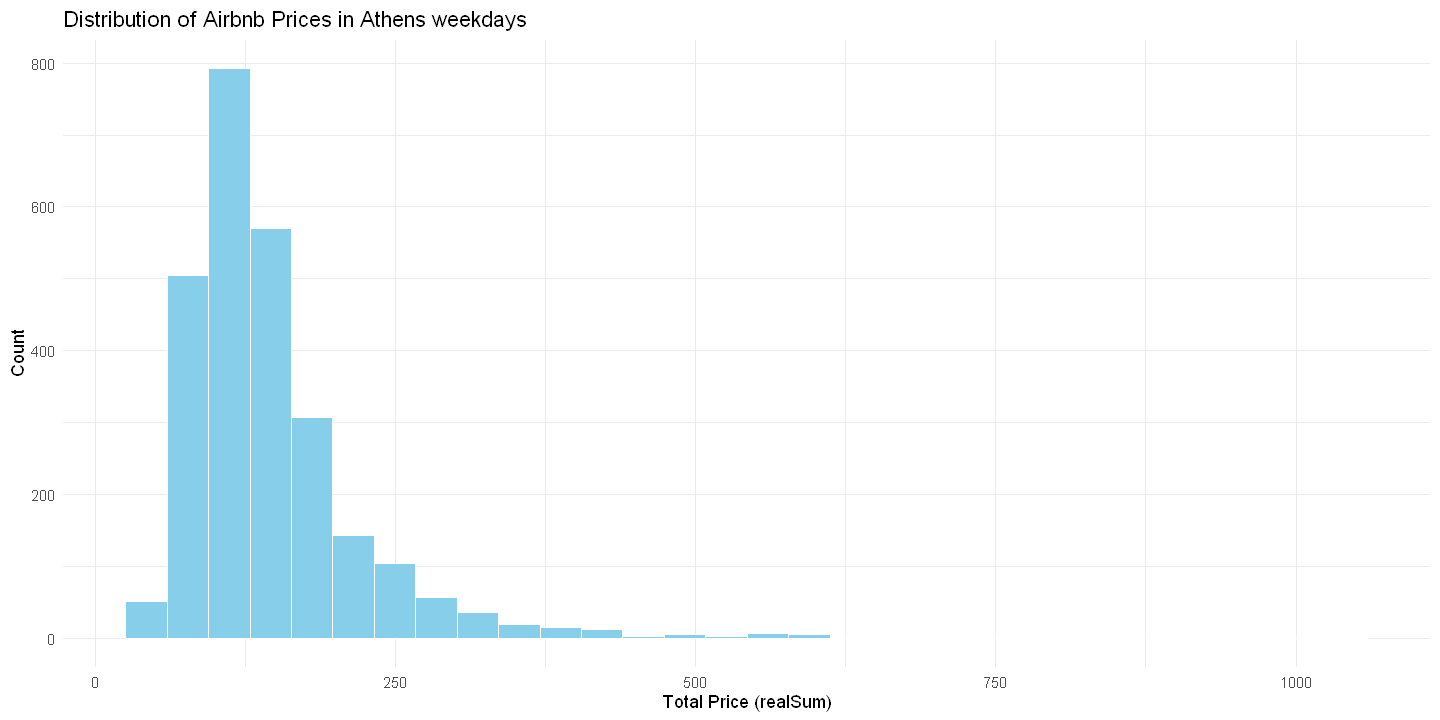

`stat_bin()` using `bins = 30`. Pick better value `binwidth`.


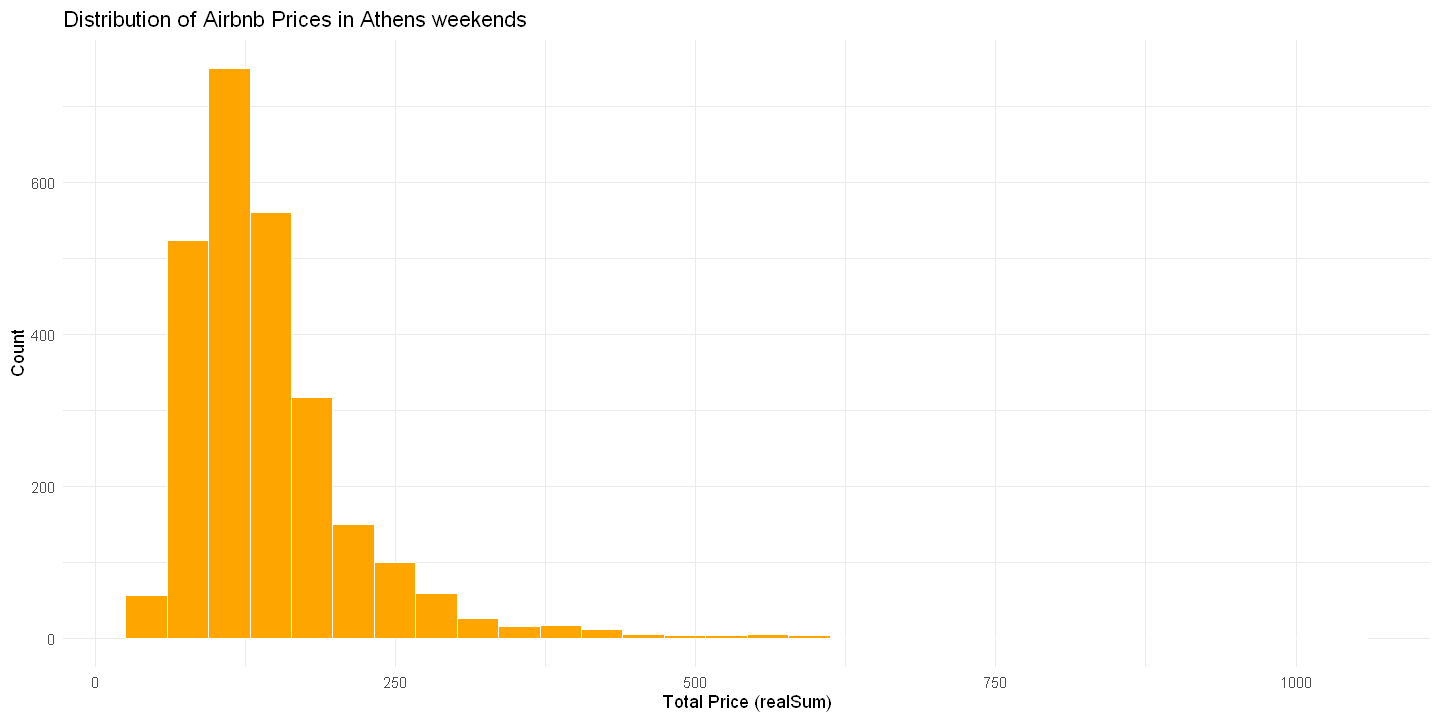

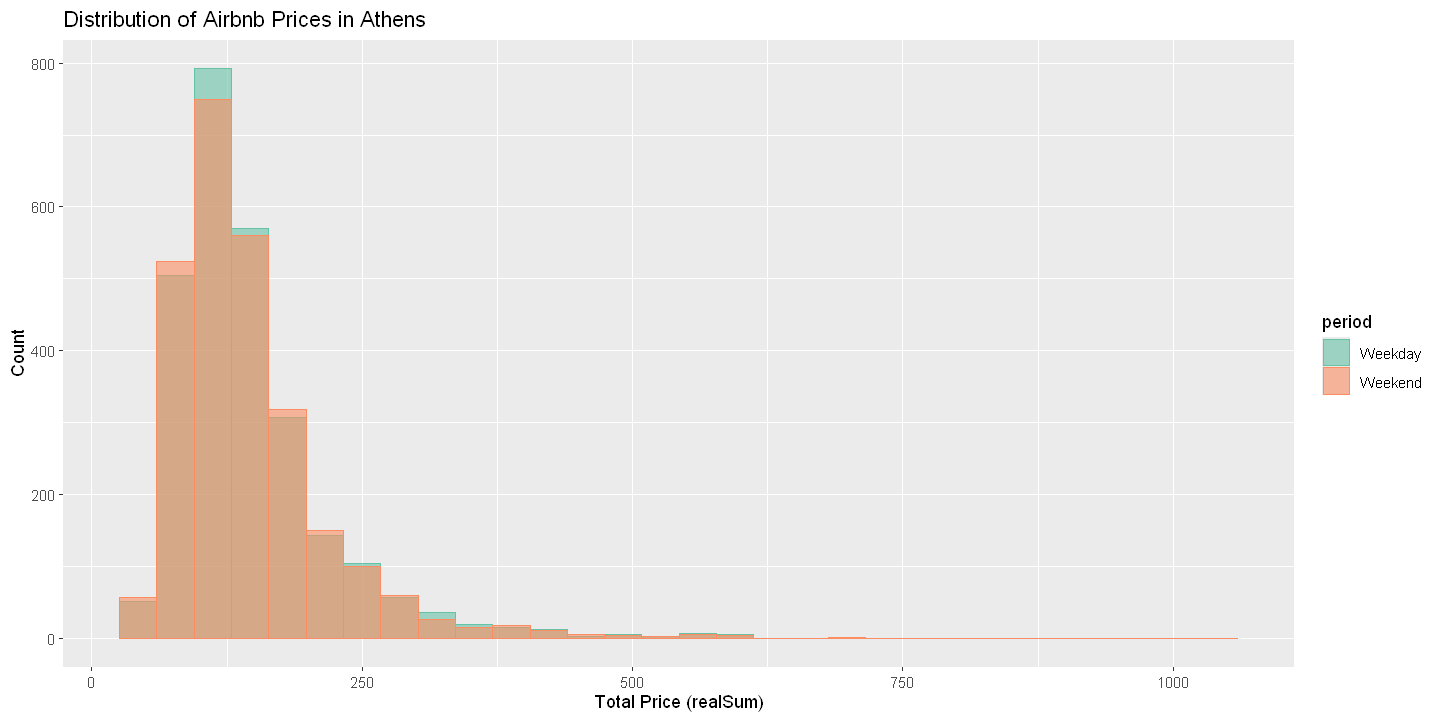

In [25]:
# Visualizing the distribution of prices

distribution_price_weekends <- ggplot(athens_weekends_clean, aes(x = realSum)) +
    geom_histogram(bins = 30, fill = "orange", color = "white") +
    labs(title = "Distribution of Airbnb Prices in Athens weekends",
        x = "Total Price (realSum)",
        y = "Count") +
    theme_minimal()

distribution_price_weekdays <- ggplot(athens_weekdays_clean, aes(x = realSum)) +
    geom_histogram(bins = 30, fill = "skyblue", color = "white") +
    labs(title = "Distribution of Airbnb Prices in Athens weekdays",
        x = "Total Price (realSum)",
        y = "Count") +
    theme_minimal()

options(repr.plot.width = 12, repr.plot.height = 6)
distribution_price_weekdays
distribution_price_weekends

ggplot(athens, aes(x = realSum, fill = period, color = period)) +
  geom_histogram(position = "identity", alpha = 0.6) +
  labs(title = "Distribution of Airbnb Prices in Athens",
        x = "Total Price (realSum)",
        y = "Count") +
  scale_fill_brewer(palette = "Set2") +
  scale_color_brewer(palette = "Set2")

### 3.2 Provide a visualization that you consider relevant to address your question or to explore the data.


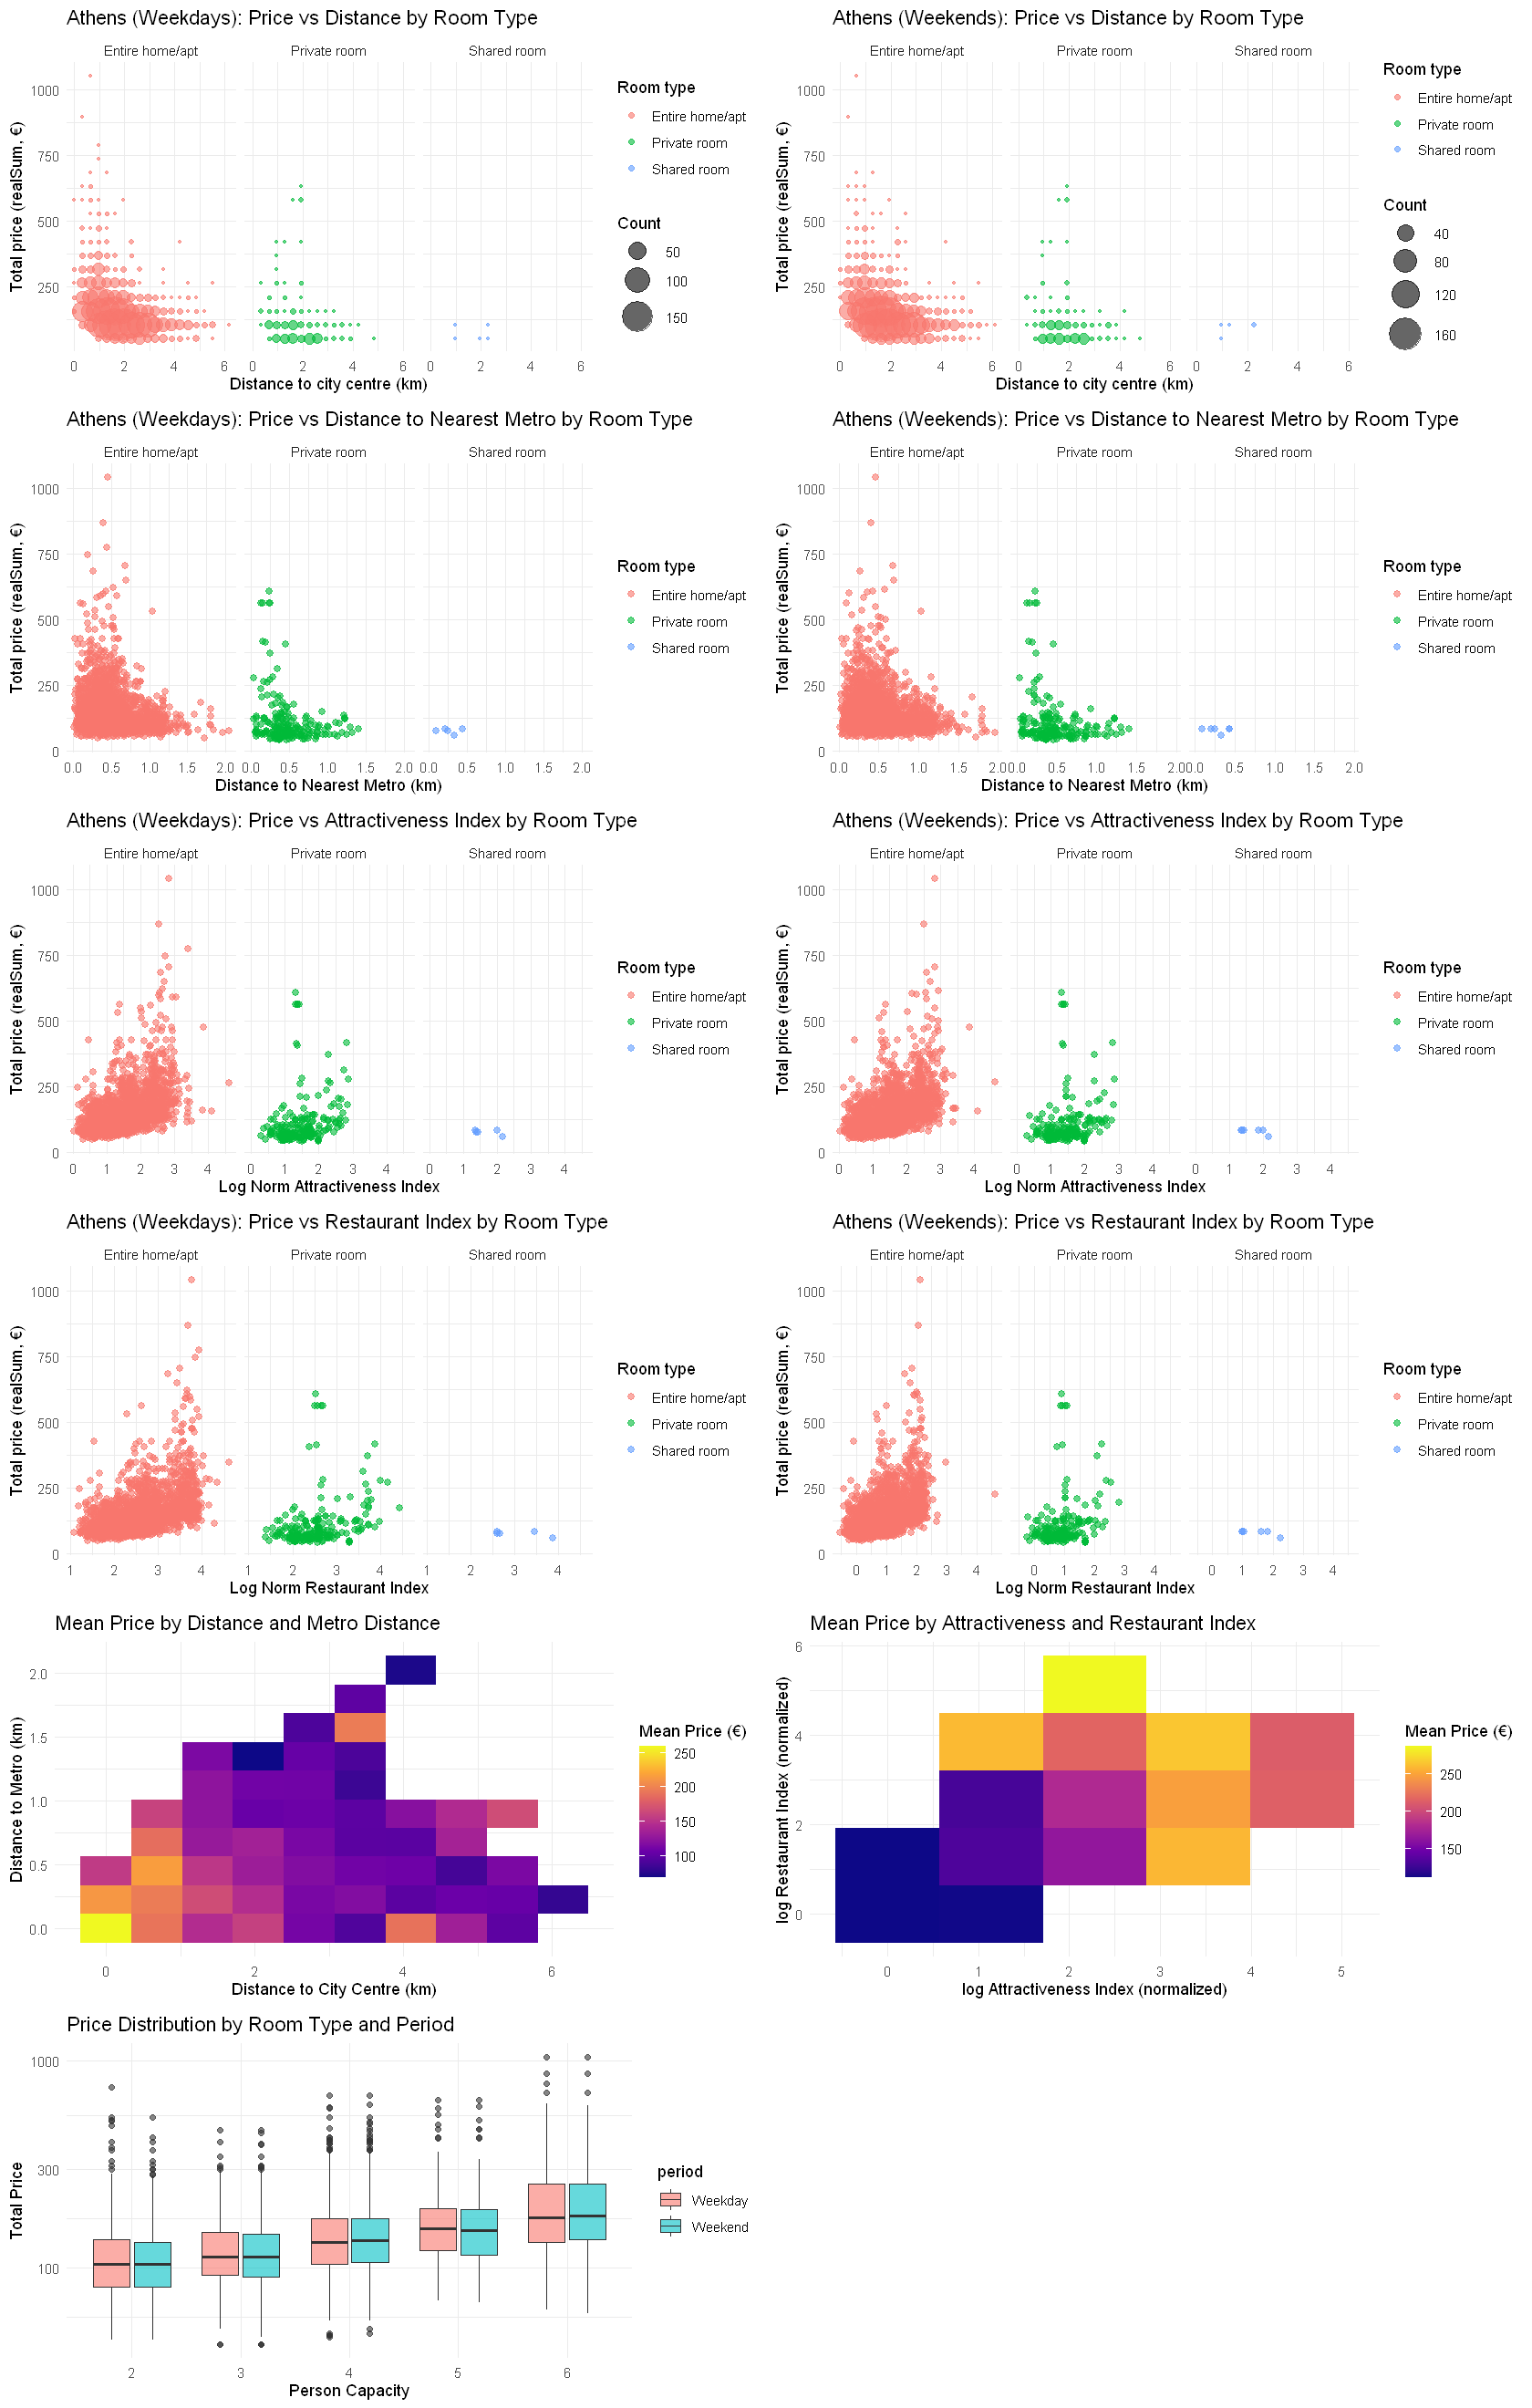

In [26]:
# Scatter plot: price vs distance to city centre, colored by room type
weekdays_price_dist_plot <- ggplot(athens_weekdays_clean,
                                   aes(x = dist, y = realSum, color = room_type)) +
  stat_bin_2d(
    geom = "point",
    bins = 20,
    aes(size = after_stat(count)),  # bubble size = count
    alpha = 0.6,
    show.legend = c(fill = FALSE)   # <-- turn off the fill legend added by stat_bin_2d
  ) +
  facet_wrap(~ room_type) +
  scale_size_area(max_size = 10, name = "Count") +
  guides(fill = "none",                      # extra safety
         colour = guide_legend(title = "Room type"),
         size   = guide_legend(title = "Count")) +
  labs(title = "Athens (Weekdays): Price vs Distance by Room Type",
       y = "Total price (realSum, €)",
       x = "Distance to city centre (km)") +
  theme_minimal()


weekends_price_dist_plot <- ggplot(athens_weekends_clean,
                                   aes(x = dist, y = realSum, color = room_type)) +
  stat_bin_2d(
    geom = "point",
    bins = 20,
    aes(size = after_stat(count)),  # bubble size = count
    alpha = 0.6,
    show.legend = c(fill = FALSE)   # <-- turn off the fill legend added by stat_bin_2d
  ) +
  facet_wrap(~ room_type) +
  scale_size_area(max_size = 10, name = "Count") +
  guides(fill = "none",                      # extra safety
         colour = guide_legend(title = "Room type"),
         size   = guide_legend(title = "Count")) +
  labs(title = "Athens (Weekends): Price vs Distance by Room Type",
       y = "Total price (realSum, €)",
       x = "Distance to city centre (km)") +
  theme_minimal()
  
# metro_dist	attr_index	rest_index
weekdays_price_metro_plot <- ggplot(athens_weekdays_clean, aes(x = metro_dist, y = realSum, color = room_type)) +
    geom_point(alpha = 0.6, size = 1.8) +
    facet_wrap(~ room_type) +
    labs(title = "Athens (Weekdays): Price vs Distance to Nearest Metro by Room Type",
            y = "Total price (realSum, €)",
            x = "Distance to Nearest Metro (km)",
            color = "Room type") +
  theme_minimal()

weekends_price_metro_plot <- ggplot(athens_weekends_clean, aes(x = metro_dist, y = realSum, color = room_type)) +
    geom_point(alpha = 0.6, size = 1.8) +
    facet_wrap(~ room_type) +
    labs(title = "Athens (Weekends): Price vs Distance to Nearest Metro by Room Type",
            x = "Distance to Nearest Metro (km)",
            y = "Total price (realSum, €)",
            color = "Room type") +
    theme_minimal()

weekdays_price_attr_plot <- ggplot(athens_weekdays_clean, aes(x = log(attr_index_norm), y = realSum, color = room_type)) +
    geom_point(alpha = 0.6, size = 1.8) +
    facet_wrap(~ room_type) +
    labs(title = "Athens (Weekdays): Price vs Attractiveness Index by Room Type",
            y = "Total price (realSum, €)",
            x = "Log Norm Attractiveness Index",
            color = "Room type") +
  theme_minimal()

weekends_price_attr_plot <- ggplot(athens_weekends_clean, aes(x = log(attr_index_norm), y = realSum, color = room_type)) +
    geom_point(alpha = 0.6, size = 1.8) +
    facet_wrap(~ room_type) +
    labs(title = "Athens (Weekends): Price vs Attractiveness Index by Room Type",
            x = "Log Norm Attractiveness Index",
            y = "Total price (realSum, €)",
            color = "Room type") +
  theme_minimal()

weekdays_price_rest_plot <- ggplot(athens_weekdays_clean, aes(x = log(rest_index_norm), y = realSum, color = room_type)) +
    geom_point(alpha = 0.6, size = 1.8) +
    facet_wrap(~ room_type) +
    labs(title = "Athens (Weekdays): Price vs Restaurant Index by Room Type",
            y = "Total price (realSum, €)",
            x = "Log Norm Restaurant Index",
            color = "Room type") +
  theme_minimal()

weekends_price_rest_plot <- ggplot(athens_weekends_clean, aes(x = log(rest_index_norm), y = realSum, color = room_type)) +
    geom_point(alpha = 0.6, size = 1.8) +
    facet_wrap(~ room_type) +
    labs(title = "Athens (Weekends): Price vs Restaurant Index by Room Type",
            x = "Log Norm Restaurant Index",
            y = "Total price (realSum, €)",
            color = "Room type") +
  theme_minimal()

price_person_capacity_plot <- ggplot(athens, aes(x = as_factor(person_capacity), y = realSum, fill = period)) +
  geom_boxplot(alpha = 0.6) +
  scale_y_log10() +
  labs(title = "Price Distribution by Room Type and Period",
       y = "Total Price", x = "Person Capacity") +
  theme_minimal()

price_double_dist_plot <- ggplot(athens, aes(x = dist, y = metro_dist, z = realSum)) +
  stat_summary_2d(fun = mean, bins = 10) +
  scale_fill_viridis_c(option = "C") +
  labs(title = "Mean Price by Distance and Metro Distance",
       x = "Distance to City Centre (km)", y = "Distance to Metro (km)",
       fill = "Mean Price (€)") +
  theme_minimal()

price_double_index_plot <- ggplot(athens, aes(x = log(attr_index_norm), y = log(rest_index_norm), z = realSum)) +
  stat_summary_2d(fun = mean, bins = 5) +
  scale_fill_viridis_c(option = "C") +
  labs(title = "Mean Price by Attractiveness and Restaurant Index",
       x = "log Attractiveness Index (normalized)", y = "log Restaurant Index (normalized)",
       fill = "Mean Price (€)") +
  theme_minimal()

options(repr.plot.width = 14, repr.plot.height = 22)
plot_grid(weekdays_price_dist_plot, weekends_price_dist_plot,
          weekdays_price_metro_plot, weekends_price_metro_plot,
          weekdays_price_attr_plot, weekends_price_attr_plot, 
          weekdays_price_rest_plot, weekends_price_rest_plot,
          price_double_dist_plot, price_double_index_plot, 
          price_person_capacity_plot, ncol = 2)

### 3.3 Provide the following Interpretation

- ### Explain why you consider this plot relevant to address your question or to explore the data.

    - This plot is relevant because it reveals how the response variable (realSum, representing total listing price) <mark>associated with</mark>  several  meaningful explanatory factors. Distance from city center and metro reflects accessibility, person capacity captures the scale of the accommodation, while restaurant and attractiveness indices proxy neighborhood amenities and local appeal. The plot also highlights the emptiness in some parts of the data, for instance when there are no listings with a high restaurant index but low attractiveness index, suggesting that certain combinations simply do not exist in this dataset.

- ### Interpret briefly the results obtained.
    - Across all graphs, prices are generally higher for entire homes and listings closer to the city centre or metro stations.
    - The positive association with attractiveness and restaurant indices with price suggests that listings in more expensive in amenity-rich areas.
    - Meanwhile, <mark>increases in capacity also associated with increases in price whether it's a weekday or weekends.</mark>

- ### What do you learn from your visualization?
    - <span style="opacity:0.5"> I think every factors have an impact determining the listing price, even if some show weaker correlations. Also, there might be other hidden variables, such as how luxury the Airbnb or what facility does the Airbnb have that not included but could strongly influence the listing price. The patterns also show potential non-linear relationships, especially for distance and indices—that may need transformations or interaction terms in future modeling. </span>
    - <mark> These visualizations suggest that many listing characteristics are associated to higher or lower the prices, although the strength of these associations varies. There may also be additional unobserved factors, such as what facilities are avaible or how luxury the Airbnb—that influence price but are cannot be measured or not recorded in the dataset. The plots hint at potential non-linear patterns, especially for distance and the indices, which may require transformations or interaction terms in later modeling.</mark>

### Section 4: Method and Plan

To address my question—understanding which listing and location features are most strongly associated with Airbnb prices in Athens—I will use Multiple Linear Regression (MLR) as the primary method. This approach allows me to estimate and interpret associations between each covariate with the response while adjusting for other variables (covariates) in the model.

- #### **Why is this method appropriate?**

MLR is appropriate because my research goal is to examine how multiple explanatory variables are associated with listing price, and the method provides interpretable coefficient estimates together with statistical significance measures. Since price is a continuous quantitative variable, linear regression is a suitable choice, whereas models such as logistic regression or Poisson regression are not appropriate because they are designed for categorical or count outcomes rather than continuous numerical responses.

- #### **Which assumptions are required?**

MLR require 5 assumptions: The assumption of a linear relationship between `price` and the input variables, independence of errors, a normal conditional distribution of errors, equal variance of errors, and independence among input variables to prevent multicollinearity.

- #### **What are the potential limitations or weaknesses of the method selected?**

Because the data are observational, any relationships identified should be interpreted as associations rather than causal effects. The true relationship between price and features may not be perfectly linear, which could reduce model fit if transformations or interaction terms are needed. Additionally, multicolinearity, unobserved factors, and outliers may reduce the accuracy of association model.


### Section 5: Computational Code and Output

In [27]:
colnames(athens)

[1] "X"                          "realSum"                   
 [3] "room_type"                  "person_capacity"           
 [5] "host_is_superhost"          "cleanliness_rating"        
 [7] "guest_satisfaction_overall" "bedrooms"                  
 [9] "dist"                       "metro_dist"                
[11] "attr_index_norm"            "rest_index_norm"           
[13] "period"

In [50]:
# Fit the multiple linear regression model (inference focus)
airbnb_MLR <- lm(
  realSum ~ .-X,
  data = athens
)

# Create a tidy coefficient table with confidence intervals
airbnb_MLR_results <- tidy(airbnb_MLR, conf.int = TRUE, conf.lvl=0.95) %>% mutate_if(is.numeric, round, 3) %>%
  arrange(p.value)

f_test <- glance(airbnb_MLR)

airbnb_MLR_results
f_test

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
room_typePrivate room,-12.771,3.579,-3.568,0.000,-19.788,-5.754
person_capacity,12.697,0.962,13.203,0.000,10.812,14.582
cleanliness_rating,7.806,1.640,4.759,0.000,4.590,11.021
bedrooms,22.012,1.833,12.010,0.000,18.419,25.605
dist,-10.173,1.226,-8.301,0.000,-12.576,-7.771
metro_dist,-15.872,3.304,-4.804,0.000,-22.349,-9.395
attr_index_norm,3.819,0.268,14.239,0.000,3.293,4.345
rest_index_norm,1.643,0.149,10.999,0.000,1.350,1.935
periodWeekend,22.570,2.663,8.476,0.000,17.350,27.790


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.347994,0.3465082,65.63307,234.2177,0,12,-29571.83,59171.65,59263.65,22684348,5266,5279


The model output suggests that several variables are strongly associated with higher listing prices, including person capacity, number of bedrooms, attractiveness index, restaurant index, and being listed on weekends, all of which have positive and statistically significant coefficients. Both distance variables (dist and metro_dist) show negative associations with price, indicating that listings farther from the city centre or metro stations tend to have lower prices after accounting for other features. Shared and private rooms are associated with substantially lower prices compared to entire homes, consistent with expectations. A few variables, such as guest satisfaction and superhost status, show weak or non-significant associations, and the moderate adjusted R² (~0.35) suggests that additional unobserved factors likely contribute to price variation.

### Reference

Kaggle dataset by The Devastator (2021).
https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities.